# LetsGrowMore (LGMVIP) - "DATA SCIENCE INTERN"

### TASK-8- ADVANCED LEVEL TASK
#### Next Word Prediction :
Using Tensorflow and Keras library train a RNN, to predict the next word. 

### Importing Libraries

In [28]:
#Importing packages
import numpy as np
np.random.seed(42)
import tensorflow as tf
tf.random.set_seed(42)
 
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.layers import LSTM, Dropout
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.layers import Dense, Activation, Dropout, RepeatVector
from tensorflow.keras.optimizers import  RMSprop
import matplotlib.pyplot as plt
import pickle
import heapq

### Loading the data

In [29]:
#Loading the data
path = "1661-0.txt"
text = open(path,encoding = "utf8").read().lower()
print('corpus length:', len(text))

corpus length: 581888


### Data Preprocessing

In [30]:
#Data Preprocessing
character = sorted(list(set(text)))
char_indices = dict((c, i) for i, c in enumerate(character))
indices_char = dict((i, c) for i, c in enumerate(character))
 
print(f'unique chars: {len(character)}')

unique chars: 73


In [31]:
#chunk 40 characters with 3 sequences
seq_len = 40
step = 3
sentences = []
next_chars = []
for i in range(0, len(text) - seq_len, step):
    sentences.append(text[i: i + seq_len ])
    next_chars.append(text[i + seq_len])
print(f'num training examples: {len(sentences)}')

num training examples: 193950


In [32]:
# generating our features and labels
#one hot encoding
import numpy as np

# Assuming you have defined 'sentences', 'seq_len', 'character', 'char_indices', and 'next_chars' somewhere

# Generating our features and labels
# One hot encoding
X = np.zeros((len(sentences), seq_len, len(character)), dtype=bool)
y = np.zeros((len(sentences), len(character)), dtype=bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        X[i, t, char_indices[char]] = True  # Using 'True' instead of '1'
    y[i, char_indices[next_chars[i]]] = True  # Using 'True' instead of '1'

print(sentences[124])
print(next_chars[100])



author: arthur conan doyle

release dat
e


In [33]:
#one hot encoded data
X[0][0]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True])

In [34]:
#one hot encoded data
y[0]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [35]:
X.shape

(193950, 40, 73)

In [36]:
y.shape

(193950, 73)

### Creating the model

In [37]:
# Creating the model
model = Sequential()
model.add(LSTM(128, input_shape=(seq_len, len(character))))
model.add(Dense(len(character)))
model.add(Activation('softmax'))

### Model summary

In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 128)               103424    
                                                                 
 dense_1 (Dense)             (None, 73)                9417      
                                                                 
 activation_1 (Activation)   (None, 73)                0         
                                                                 
Total params: 112841 (440.79 KB)
Trainable params: 112841 (440.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Training our model

In [39]:
# Training our model
optimizer = RMSprop(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(X, y,
                    validation_split=0.01, 
                    batch_size=128,
                    epochs=7, 
                    shuffle=True).history

Epoch 1/7
1501/1501 [==============================] - 201s 132ms/step - loss: 2.0448 - accuracy: 0.4039 - val_loss: 2.2196 - val_accuracy: 0.3814
Epoch 2/7
1501/1501 [==============================] - 191s 127ms/step - loss: 1.6644 - accuracy: 0.5001 - val_loss: 2.0259 - val_accuracy: 0.4485
Epoch 3/7
1501/1501 [==============================] - 192s 128ms/step - loss: 1.5454 - accuracy: 0.5331 - val_loss: 2.0044 - val_accuracy: 0.4309
Epoch 4/7
1501/1501 [==============================] - 196s 131ms/step - loss: 1.4823 - accuracy: 0.5511 - val_loss: 1.9491 - val_accuracy: 0.4624
Epoch 5/7
1501/1501 [==============================] - 193s 129ms/step - loss: 1.4415 - accuracy: 0.5615 - val_loss: 1.8967 - val_accuracy: 0.4521
Epoch 6/7
1501/1501 [==============================] - 196s 130ms/step - loss: 1.4119 - accuracy: 0.5691 - val_loss: 1.9031 - val_accuracy: 0.4670
Epoch 7/7
1501/1501 [==============================] - 189s 126ms/step - loss: 1.3909 - accuracy: 0.5748 - val_loss: 1

### saving our model

In [40]:
#saving our model
model.save('NW_keras_model.h5')
pickle.dump(history, open("history.p", "wb"))

### loading our model

In [41]:
#loading our model
model = load_model('NW_keras_model.h5')
history = pickle.load(open("history.p", "rb"))

### Model Evaluation 

In [42]:
#Model Evaluation
loss_and_acc=model.evaluate(X,y)
print("Test Loss", loss_and_acc[0])
print("Test Accuracy", loss_and_acc[1])

6061/6061 [==============================] - 129s 21ms/step - loss: 1.3473 - accuracy: 0.5859
Test Loss 1.3472890853881836
Test Accuracy 0.5859293341636658


### Plotting training and validation plots

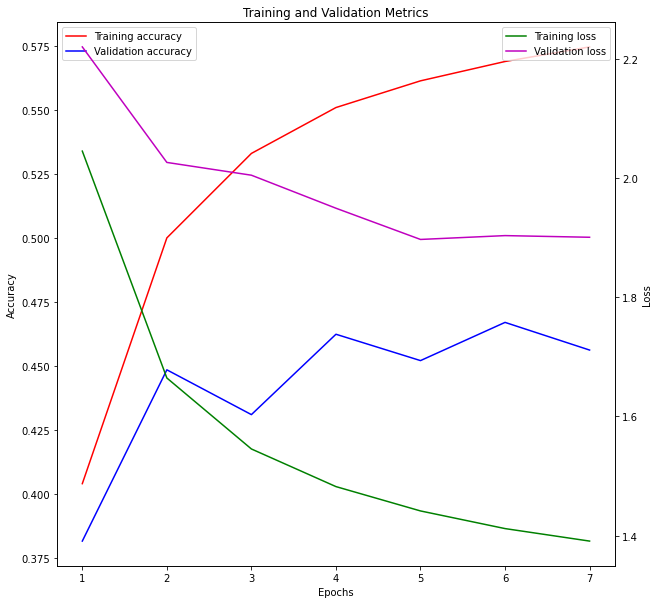

In [60]:
import matplotlib.pyplot as plt

# Assuming you have defined 'history' containing the training history

acc = history['accuracy']
val_acc = history['val_accuracy']
loss = history['loss']
val_loss = history['val_loss']
epochs = range(1, len(acc) + 1)  # Assuming epochs are 1-indexed

fig, ax1 = plt.subplots(figsize=(10, 10))

# Plotting accuracy on the first y-axis (left)
ax1.plot(epochs, acc, 'r', label='Training accuracy')
ax1.plot(epochs, val_acc, 'b', label='Validation accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend(loc='upper left')

# Creating a second y-axis (right) for plotting loss
ax2 = ax1.twinx()
ax2.plot(epochs, loss, 'g', label='Training loss')
ax2.plot(epochs, val_loss, 'm', label='Validation loss')
ax2.set_ylabel('Loss')
ax2.legend(loc='upper right')

# Title and overall legend
plt.title('Training and Validation Metrics')
plt.show()


In [44]:
def prepare_input(text):
    x = np.zeros((1, seq_len, len(character)))
    for t, char in enumerate(text):
        x[0, t, char_indices[char]] = 1.
        
    return x

prepare_input("This is an example of input of our model".lower())

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

### functions to get next probable characters

In [45]:
#functions to get next probable characters
def sample(preds, top_n=3):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds)
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    
    return heapq.nlargest(top_n, range(len(preds)), preds.take)

In [46]:
def predict_completion(text):
    original_text = text
    generated = text
    completion = ''
    while True:
        x = prepare_input(text)
        preds = model.predict(x, verbose=0)[0]
        next_index = sample(preds, top_n=1)[0]
        next_char = indices_char[next_index]
        text = text[1:] + next_char
        completion += next_char
        
        if len(original_text + completion) + 2 > len(original_text) and next_char == ' ':
            return completion

In [47]:
def predict_completions(text, n=3):
    x = prepare_input(text)
    preds = model.predict(x, verbose=0)[0]
    next_indices = sample(preds, n)
    return [indices_char[idx] + predict_completion(text[1:] + indices_char[idx]) for idx in next_indices]

### Prediction

In [61]:
#Prediction
quotes = [   
    "Deep learning is subset of machine learning,which is essentially a neural network with three or more layers.",
    "Machine learning  is the study of computer algorithms that improve automatically through experience and by the use of data.",
    "It is not a lack of love, but a lack of friendship that makes unhappy marriages.",
    "Recurrent neural network (RNN) is a type of artificial neural network which uses sequential data or time series data.",
    "Thanks for spending your precious time to view my work."  
    
]
print(quotes)

['Deep learning is subset of machine learning,which is essentially a neural network with three or more layers.', 'Machine learning  is the study of computer algorithms that improve automatically through experience and by the use of data.', 'It is not a lack of love, but a lack of friendship that makes unhappy marriages.', 'Recurrent neural network (RNN) is a type of artificial neural network which uses sequential data or time series data.', 'Thanks for spending your precious time to view my work.']


In [62]:
for q in quotes:
    seq = q[:40].lower()
    print(seq)
    print(predict_completions(seq, 5))
    print()

deep learning is subset of machine learn
[' of ', 'ed ', 'ing ', '. ', ', ']

machine learning  is the study of comput
['e ', ' of ', 'ance ', 'her ', 'ion ']

it is not a lack of love, but a lack of 
['the ', 'a ', 'her ', 'course ', 'my ']

recurrent neural network (rnn) is a type
['writion ', 'rtable ', 'ctor ', 'y ', 'ssable ']

thanks for spending your precious time t
['o ', 'hat ', 'ime ', 'race ', 'en ']

